In [1]:
%matplotlib inline
#Import relevant packages and make sure path is correctly setup
import sys
import os
import torch
import numpy as np
import copy

current_dir = os.path.abspath('.')
sys.path.append(os.path.join(current_dir,'../../'))

from armRobot.Game import Game
from armRobot.World import World
from armRobot.Evaluator import Evaluator
from framework.Networks import MLP
from framework.Model import Model
from framework.DataBuffer import DataBuffer
from framework.Utils import Utils

from DaggerTrainer import DaggerTrainer

# Set random seeds for consistency across runs
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)

# Create a folder to hold the model checkpoints and evaluation plots
simple_model = os.path.join(current_dir,'simple_model')
dagger_model = os.path.join(current_dir,'dagger_model')


if(not os.path.exists(simple_model)):
    os.mkdir(simple_model)

if(not os.path.exists(dagger_model)):
    os.mkdir(dagger_model)
    
# Define your compute device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Set the random seeds for consistency across runs
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)



pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# World Configuration dictionary
world_config = {'arm_configuration': [np.array([0.5,0.5]),np.array([0.5,0.7]),np.array([0.5,0.9])],
'dynamics_params_no':-1,
 'change_start_config':False,

}


In [3]:
world = World(**world_config)
game  = Game(world, randomise_dynamics = False,target_diameter = 16)

In [4]:
# Play the game with the ``expert'' controlling the robot arm
#game.play_game(controller = game.optimal_controller, speed=50)

In [5]:
# Define the model architecture
# The size of each layer of the MLP. The input consists of the state of the world and the 
# output of the joint angle differences to apply to the arm
layers = [world.state_size, 16, 8, world.action_size]

In [6]:
# Initialise the data holder and  generate a dataset of (state, optimal_action) by
# inquiring the expert controller

data_buffer = DataBuffer()
data_buffer.generate_dataset(world, number_of_trajectories = 250, dynamics_reset_interval = -1)

# Also generate a test-set of initial configurations 
data_buffer.initial_test_configs = data_buffer.generate_initial_configs(world,number_of_configs = 100,
                                                                        reset_dynamics = False)

print(len(data_buffer.initial_configs))

Generating dataset...
Generating initial configurations...
250


In [7]:
# Initialise the evaluator class for plotting
evaluator = Evaluator(data_buffer, simple_model)

In [8]:
########### Train a Simple Model without DAgger ##########

In [9]:
# Initialise the agent as a Multi-Layer Perceptron
agent = Model(network = MLP(layers), device = device)


In [10]:
# Initialise the utility class
utils = Utils(world,standardise_data = True)


In [11]:
# Initialise the Trainer class and train our agent
trainer = DaggerTrainer(world, agent, data_buffer, utils, device, number_of_input_states = 1, 
                        save_folder = simple_model, epochs = 30)

In [12]:
hist = trainer.train()

Training the agent...
epoch :0, gradient step : 27, loss : 0.07750644099001175
epoch :0, gradient step : 54, loss : 0.07165787511577595
epoch :0, gradient step : 81, loss : 0.06735695889223209
epoch :0, gradient step : 108, loss : 0.06259994942489867
epoch :0, gradient step : 135, loss : 0.05956907744056918
epoch :0, gradient step : 162, loss : 0.05642169650249798
epoch :0, gradient step : 189, loss : 0.05382964732948988
epoch :0, gradient step : 216, loss : 0.05192031537150309
epoch :0, gradient step : 243, loss : 0.05001211297111611
Doing  rollouts..
Epoch 0, Train Accuracy : 0.22, Train Average min distance : 0.06885094966344052
Doing  rollouts..
Epoch 0, Test Accuracy : 0.14, Test average min distance: 0.07025814283904873
epoch :1, gradient step : 270, loss : 0.04850130449251673
epoch :1, gradient step : 297, loss : 0.04710414713910403
epoch :1, gradient step : 324, loss : 0.04584257847560953
epoch :1, gradient step : 351, loss : 0.044647280173908864
epoch :1, gradient step : 378, 

Epoch 10, Train Accuracy : 0.125, Train Average min distance : 0.0663818337182278
Doing  rollouts..
Epoch 10, Test Accuracy : 0.135, Test average min distance: 0.06762642775343479
epoch :11, gradient step : 2889, loss : 0.021047262054543485
epoch :11, gradient step : 2916, loss : 0.020964590240473188
epoch :11, gradient step : 2943, loss : 0.020918415846720915
epoch :11, gradient step : 2970, loss : 0.020858540007774696
epoch :11, gradient step : 2997, loss : 0.020804826114785235
epoch :11, gradient step : 3024, loss : 0.02074320515496541
epoch :11, gradient step : 3051, loss : 0.02067776506307827
epoch :11, gradient step : 3078, loss : 0.02061777061184347
epoch :11, gradient step : 3105, loss : 0.020560614106159086
epoch :11, gradient step : 3132, loss : 0.020519428217931287
Doing  rollouts..
Epoch 11, Train Accuracy : 0.1, Train Average min distance : 0.07720695251226263
Doing  rollouts..
Epoch 11, Test Accuracy : 0.135, Test average min distance: 0.06616418078927298
epoch :12, gradi

epoch :21, gradient step : 5589, loss : 0.017253280170915895
epoch :21, gradient step : 5616, loss : 0.017219308864867996
epoch :21, gradient step : 5643, loss : 0.017191809379305593
epoch :21, gradient step : 5670, loss : 0.01716554292332085
epoch :21, gradient step : 5697, loss : 0.017153917695205537
epoch :21, gradient step : 5724, loss : 0.017131182964669266
Doing  rollouts..
Epoch 21, Train Accuracy : 0.17, Train Average min distance : 0.060510513783501994
Doing  rollouts..
Epoch 21, Test Accuracy : 0.155, Test average min distance: 0.06103067130756967
epoch :22, gradient step : 5751, loss : 0.017111012684732283
epoch :22, gradient step : 5778, loss : 0.017089849055168423
epoch :22, gradient step : 5805, loss : 0.017071716455769877
epoch :22, gradient step : 5832, loss : 0.0170506558728213
epoch :22, gradient step : 5859, loss : 0.017011345654550425
epoch :22, gradient step : 5886, loss : 0.01698878104596493
epoch :22, gradient step : 5913, loss : 0.016966741812876277
epoch :22, g

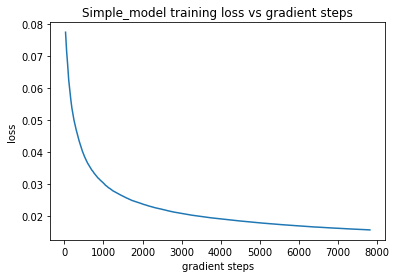

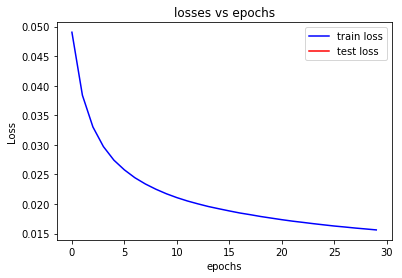

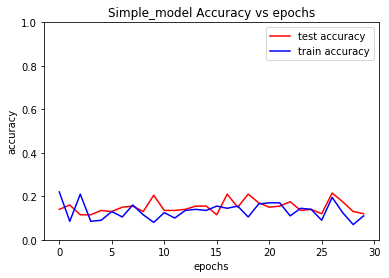

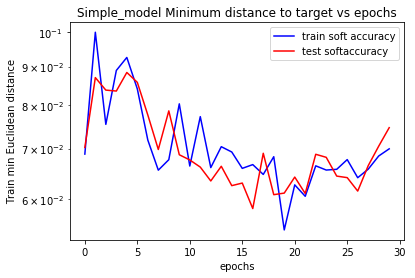

In [13]:
# show the training graphs
evaluator.plot_training_history(hist,stage = 'Simple_model',show = True)

In [14]:
def agent_controller(**kwargs):
    state = kwards['state']
    state = agent.expand_input_for_inference(state,world,utils.standardise_data)
    action = agent.infer(state)
    if(utils.standardise_data):
        return world.un_standardise(action,'action')

# Play the game with the agent controlling the robot arm
#game.play_game(controller = agent_controller)

In [15]:
utils.do_rollouts(trainer.rollout_function, initial_configs = data_buffer.initial_test_configs, subset_proportion =1.)

Doing  rollouts..


(0.13, 0.06464506831137777)

In [16]:
######## Continue the training using the DAgger Algorithm ##########

In [17]:
# Initialise the agent to the previous agent weights
network = MLP(layers)
network.load_state_dict(agent.network.state_dict())
agent_dagger = Model(network = network, device = device)

In [18]:
#Initialise a new data buffer by copying the previous one
data_buffer_dagger = DataBuffer()
data_buffer_dagger.load(copy.deepcopy(data_buffer.get_full_data_dict()))

In [19]:
# Initialise the Trainer class with  dagger activated
trainer = DaggerTrainer(world, agent_dagger, data_buffer_dagger, utils, device, number_of_input_states = 1, 
                        save_folder = dagger_model, epochs = 40, dagger_start = 0, dagger_add_interval =5, dagger_rollouts = 250)

In [20]:
# Train the new agent with dagger
hist = trainer.train()

Training the agent...
epoch :0, gradient step : 27, loss : 0.010792268009506466
epoch :0, gradient step : 54, loss : 0.011132296547317807
epoch :0, gradient step : 81, loss : 0.012428886098787685
epoch :0, gradient step : 108, loss : 0.012025393276777863
epoch :0, gradient step : 135, loss : 0.011801054394886816
epoch :0, gradient step : 162, loss : 0.011554405888601476
epoch :0, gradient step : 189, loss : 0.011363105173027306
epoch :0, gradient step : 216, loss : 0.011192987965136122
epoch :0, gradient step : 243, loss : 0.010978669239552328
Doing  rollouts..
Epoch 0, Train Accuracy : 0.17, Train Average min distance : 0.06320409659942457
Doing  rollouts..
Epoch 0, Test Accuracy : 0.135, Test average min distance: 0.06416858266416707
Starting dagger...
Adding dagger data...
Doing  rollouts..
Dagger Acc : 0.188, Dagger min dist: 0.06506072532454217
Adding policy generated data...
epoch :1, gradient step : 326, loss : 0.030748494188627053
epoch :1, gradient step : 489, loss : 0.0547614

epoch :10, gradient step : 21000, loss : 0.05395457156197736
epoch :10, gradient step : 21300, loss : 0.05374797002600241
epoch :10, gradient step : 21600, loss : 0.053558996408679574
epoch :10, gradient step : 21900, loss : 0.05336881584926898
epoch :10, gradient step : 22200, loss : 0.05319432237318475
epoch :10, gradient step : 22500, loss : 0.05302013021994201
epoch :10, gradient step : 22800, loss : 0.05283491366890146
epoch :10, gradient step : 23100, loss : 0.05266147627806882
Doing  rollouts..
Epoch 10, Train Accuracy : 0.325, Train Average min distance : 0.03268029690828304
Doing  rollouts..
Epoch 10, Test Accuracy : 0.32, Test average min distance: 0.033897613335297436
Adding dagger data...
Doing  rollouts..
Dagger Acc : 0.28, Dagger min dist: 0.03356599460553479
Adding policy generated data...
epoch :11, gradient step : 23688, loss : 0.052277026016040506
epoch :11, gradient step : 24111, loss : 0.05196051037481783
epoch :11, gradient step : 24534, loss : 0.05162701768095074


epoch :20, gradient step : 66216, loss : 0.03722763699790582
epoch :20, gradient step : 66750, loss : 0.03713423153249842
epoch :20, gradient step : 67284, loss : 0.037037807016021815
epoch :20, gradient step : 67818, loss : 0.036944028463228196
epoch :20, gradient step : 68352, loss : 0.03685619909940764
epoch :20, gradient step : 68886, loss : 0.03676742022332786
epoch :20, gradient step : 69420, loss : 0.03667710461978777
epoch :20, gradient step : 69954, loss : 0.03659403868117353
epoch :20, gradient step : 70488, loss : 0.03650271532072605
epoch :20, gradient step : 71022, loss : 0.036424143895830166
Doing  rollouts..
Epoch 20, Train Accuracy : 0.34, Train Average min distance : 0.024115170831261946
Doing  rollouts..
Epoch 20, Test Accuracy : 0.375, Test average min distance: 0.024657163643859947
Adding dagger data...
Doing  rollouts..
Dagger Acc : 0.348, Dagger min dist: 0.02485224109872388
Adding policy generated data...
epoch :21, gradient step : 71706, loss : 0.036288999374985

Doing  rollouts..
Epoch 29, Train Accuracy : 0.105, Train Average min distance : 0.05211166210474636
Doing  rollouts..
Epoch 29, Test Accuracy : 0.115, Test average min distance: 0.047276173377994786
epoch :30, gradient step : 133678, loss : 0.029189405141881973
epoch :30, gradient step : 134429, loss : 0.029135548205875092
epoch :30, gradient step : 135180, loss : 0.02908519759765262
epoch :30, gradient step : 135931, loss : 0.029032668590667002
epoch :30, gradient step : 136682, loss : 0.028976735039594193
epoch :30, gradient step : 137433, loss : 0.028926525008399515
epoch :30, gradient step : 138184, loss : 0.02887929242049587
epoch :30, gradient step : 138935, loss : 0.02883035034772847
epoch :30, gradient step : 139686, loss : 0.02877710472954037
epoch :30, gradient step : 140437, loss : 0.028730604067739713
Doing  rollouts..
Epoch 30, Train Accuracy : 0.53, Train Average min distance : 0.019559200379403997
Doing  rollouts..
Epoch 30, Test Accuracy : 0.495, Test average min dista

epoch :39, gradient step : 215232, loss : 0.024974039940807297
epoch :39, gradient step : 216144, loss : 0.024940750020659184
epoch :39, gradient step : 217056, loss : 0.02491062308660663
epoch :39, gradient step : 217968, loss : 0.02487721994248742
epoch :39, gradient step : 218880, loss : 0.024846629539874585
Doing  rollouts..
Epoch 39, Train Accuracy : 0.645, Train Average min distance : 0.017392100492490053
Doing  rollouts..
Epoch 39, Test Accuracy : 0.67, Test average min distance: 0.017317551522283207


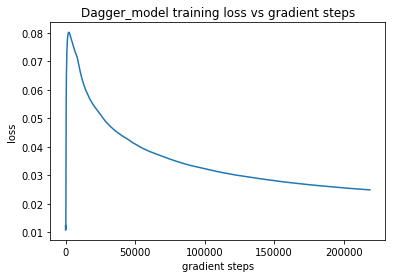

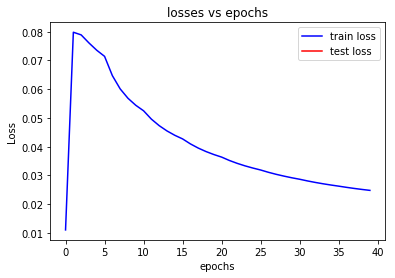

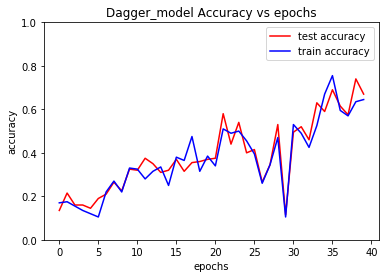

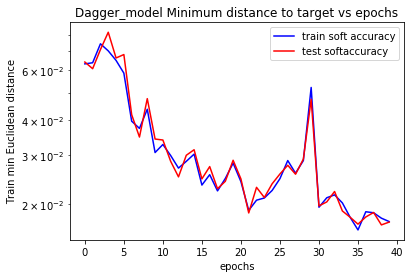

In [21]:
# show the training graphs
evaluator.plot_training_history(hist,stage = 'Dagger_model',show = True)

In [22]:
def agent_controller(**kwargs):
    state = kwards['state']
    state = agent_dagger.expand_input_for_inference(state,world,utils.standardise_data)
    action = agent_dagger.infer(state)
    if(utils.standardise_data):
        return world.un_standardise(action,'action')

# Play the game with the agent controlling the robot arm
#game.play_game(controller = agent_controller, game_type = 'manual')

In [23]:
utils.do_rollouts(trainer.rollout_function, initial_configs = data_buffer.initial_test_configs, subset_proportion =1.)

Doing  rollouts..


(0.67, 0.016957765308476373)

In [24]:
utils.do_rollouts(trainer.rollout_function)

Doing  rollouts..


(0.665, 0.01729217121329265)

In [25]:
# Initialise an agent to the pre-dagger agent
network = MLP(layers)
network.load_state_dict(agent.network.state_dict())

agent_more_data = Model(network = network, device = device)

In [26]:
# Add more data to the data buffer
data_buffer.generate_dataset(world, number_of_trajectories = 2500, dynamics_reset_interval = -1)

Generating dataset...


In [27]:
print(len(data_buffer.initial_configs))
print(len(data_buffer_dagger.initial_configs))

2750
2250


In [28]:
# Initialise the Trainer class and train our agent
trainer = DaggerTrainer(world, agent_more_data, data_buffer, utils, device, number_of_input_states = 1, 
                        save_folder = simple_model, epochs = 40)

In [29]:
hist = trainer.train()

Training the agent...
epoch :0, gradient step : 285, loss : 0.011195914779518791
epoch :0, gradient step : 570, loss : 0.010990466179251916
epoch :0, gradient step : 855, loss : 0.011007885309191631
epoch :0, gradient step : 1140, loss : 0.011029353130176141
epoch :0, gradient step : 1425, loss : 0.010885562807848548
epoch :0, gradient step : 1710, loss : 0.010733158884202685
epoch :0, gradient step : 1995, loss : 0.010720296027382963
epoch :0, gradient step : 2280, loss : 0.010754878369513816
epoch :0, gradient step : 2565, loss : 0.010802425330509268
epoch :0, gradient step : 2850, loss : 0.01078767779163805
Doing  rollouts..
Epoch 0, Train Accuracy : 0.15, Train Average min distance : 0.06858898101991082
Doing  rollouts..
Epoch 0, Test Accuracy : 0.11, Test average min distance: 0.06718308632206313
epoch :1, gradient step : 3135, loss : 0.010732158660727856
epoch :1, gradient step : 3420, loss : 0.010667626790780007
epoch :1, gradient step : 3705, loss : 0.010590798500475167
epoch :

epoch :10, gradient step : 29640, loss : 0.00864514628358854
epoch :10, gradient step : 29925, loss : 0.008632711928862903
epoch :10, gradient step : 30210, loss : 0.008620584546962745
epoch :10, gradient step : 30495, loss : 0.008605496863208075
epoch :10, gradient step : 30780, loss : 0.008592243164705728
epoch :10, gradient step : 31065, loss : 0.008578792817743427
epoch :10, gradient step : 31350, loss : 0.008568952928658204
Doing  rollouts..
Epoch 10, Train Accuracy : 0.225, Train Average min distance : 0.05145546877492068
Doing  rollouts..
Epoch 10, Test Accuracy : 0.22, Test average min distance: 0.053009427041847024
epoch :11, gradient step : 31635, loss : 0.008557612313870096
epoch :11, gradient step : 31920, loss : 0.008549286399512702
epoch :11, gradient step : 32205, loss : 0.008531020472990447
epoch :11, gradient step : 32490, loss : 0.008520318151393324
epoch :11, gradient step : 32775, loss : 0.008513978942377464
epoch :11, gradient step : 33060, loss : 0.008504354135897

epoch :20, gradient step : 58425, loss : 0.007782181041093007
epoch :20, gradient step : 58710, loss : 0.007777886710674682
epoch :20, gradient step : 58995, loss : 0.007769930530266857
epoch :20, gradient step : 59280, loss : 0.007760448727029897
epoch :20, gradient step : 59565, loss : 0.007754711809092397
epoch :20, gradient step : 59850, loss : 0.0077481832217931685
Doing  rollouts..
Epoch 20, Train Accuracy : 0.33, Train Average min distance : 0.042120053476470645
Doing  rollouts..
Epoch 20, Test Accuracy : 0.335, Test average min distance: 0.04346466952135103
epoch :21, gradient step : 60135, loss : 0.007738942251333307
epoch :21, gradient step : 60420, loss : 0.0077323860007388195
epoch :21, gradient step : 60705, loss : 0.007725727867004553
epoch :21, gradient step : 60990, loss : 0.007720856466113972
epoch :21, gradient step : 61275, loss : 0.007714758109819426
epoch :21, gradient step : 61560, loss : 0.00770995180366352
epoch :21, gradient step : 61845, loss : 0.0077023925537

epoch :30, gradient step : 87210, loss : 0.0072419971437987524
epoch :30, gradient step : 87495, loss : 0.007237165718215661
epoch :30, gradient step : 87780, loss : 0.007232812753080279
epoch :30, gradient step : 88065, loss : 0.007229314927515041
epoch :30, gradient step : 88350, loss : 0.007223846659715802
Doing  rollouts..
Epoch 30, Train Accuracy : 0.38, Train Average min distance : 0.03240240260851764
Doing  rollouts..
Epoch 30, Test Accuracy : 0.4, Test average min distance: 0.03053086310776971
epoch :31, gradient step : 88635, loss : 0.007218885312085447
epoch :31, gradient step : 88920, loss : 0.007213994395957518
epoch :31, gradient step : 89205, loss : 0.007209772629794285
epoch :31, gradient step : 89490, loss : 0.007206664409827917
epoch :31, gradient step : 89775, loss : 0.0072009361956279355
epoch :31, gradient step : 90060, loss : 0.0071962832175917575
epoch :31, gradient step : 90345, loss : 0.0071948522533627655
epoch :31, gradient step : 90630, loss : 0.0071910860635

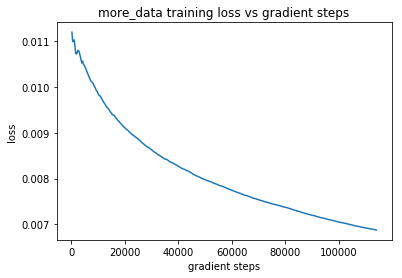

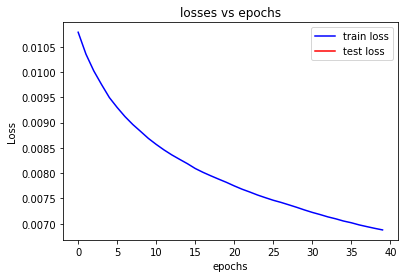

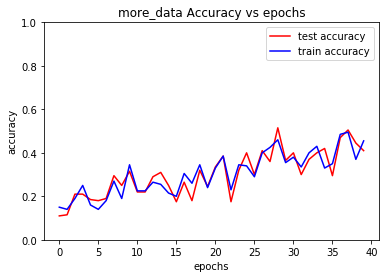

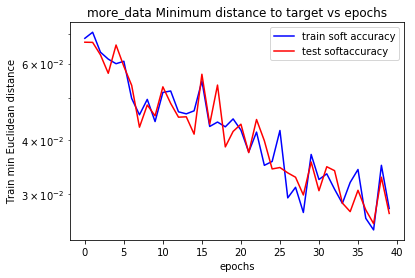

In [30]:
# show the training graphs
evaluator.plot_training_history(hist,stage = 'more_data',show = True)